In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler


In [5]:
ds = pd.read_csv("Modelar_UH2022_agg.txt", sep='|')
ds['SAMPLETIME'] = pd.to_datetime(ds['SAMPLETIME'], infer_datetime_format=True)  
ds = ds.sort_values(by=['ID', 'SAMPLETIME'])

In [6]:
ts = []
ids = []

for serie in ds['ID'].unique():
    if serie% 20 == 0 :print('reading serie:'+ str(serie))
    
    serie_samples = pd.Series(data=np.zeros(365),index=ds['SAMPLETIME'].unique())
    sample = ds.loc[ds['ID'] == serie, 'DELTA']
    sample.index = ds.loc[ds['ID'] == serie, 'SAMPLETIME']
    serie_samples.loc[ds.loc[(ds['ID'] == serie), 'SAMPLETIME']] = sample
    ts.append(serie_samples)
    ids.append(serie)

ts = np.array(ts)

reading serie:0
reading serie:20
reading serie:40
reading serie:60
reading serie:80
reading serie:100
reading serie:120
reading serie:140
reading serie:160
reading serie:180
reading serie:200
reading serie:220
reading serie:240
reading serie:260
reading serie:280
reading serie:300
reading serie:320
reading serie:340
reading serie:360
reading serie:380
reading serie:400
reading serie:420
reading serie:440
reading serie:460
reading serie:480
reading serie:500
reading serie:520
reading serie:540
reading serie:560
reading serie:580
reading serie:600
reading serie:620
reading serie:640
reading serie:660
reading serie:680
reading serie:700
reading serie:720
reading serie:740
reading serie:760
reading serie:780
reading serie:800
reading serie:820
reading serie:840
reading serie:860
reading serie:880
reading serie:900
reading serie:920
reading serie:940
reading serie:960
reading serie:980
reading serie:1000
reading serie:1020
reading serie:1040
reading serie:1060
reading serie:1080
reading ser

In [7]:
scaler = TimeSeriesScalerMeanVariance()
ts_norm = scaler.fit_transform(ts)

X_train, X_test, ind_train, ind_test, ids_train, ids_test = train_test_split(ts_norm, range(len(ts_norm)), ids, test_size=0.8)

In [8]:
km = TimeSeriesKMeans(n_clusters=10, metric="dtw")
y_train = km.fit_predict(X_train)

In [9]:
y_test = km.predict(X_test)

In [10]:
ind = np.concatenate([ind_train, ind_test])
ids2 = np.concatenate([ids_train, ids_test])
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

/tmp/ipykernel_40608/7214976.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_40608/7214976.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_40608/7214976.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_40608/7214976.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_40608/7214976.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element p

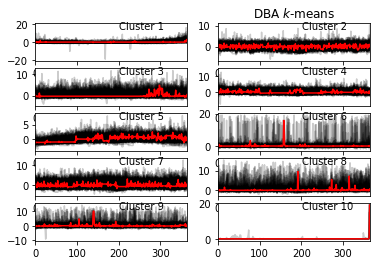

In [11]:
n = 10

for yi in range(n):
    plt.subplot(n/2, 2, yi+1)
    for xx in X[y == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 365)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

/tmp/ipykernel_40608/1594046244.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_40608/1594046244.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_40608/1594046244.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_40608/1594046244.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n/2, 2, yi+1)
/tmp/ipykernel_40608/1594046244.py:4: MatplotlibDeprecationWarning: Passing non-integers as 

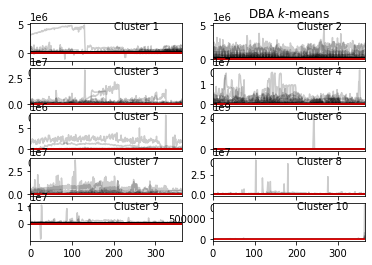

In [12]:
n = 10

for yi in range(n):
    plt.subplot(n/2, 2, yi+1)
    for xx in ts[ind[y == yi]]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 365)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

In [13]:
for yi in range(n):
    print(sum(y == yi))

188
378
262
348
210
186
741
207
218
9


In [14]:
def EDA(ds):
    plt.figure(figsize=(30,10))

    ds['DAY'] = ds['SAMPLETIME'].dt.day
    ds['MONTH'] = ds['SAMPLETIME'].dt.month
    ds['WEEKDAY'] = ds['SAMPLETIME'].dt.weekday
    
    plt.subplot(1, 3, 1)
    sns.barplot("DAY","DELTA", data = ds)
    
    plt.subplot(1, 3, 2)
    sns.barplot("MONTH","DELTA", data = ds)
    
    plt.subplot(1, 3, 3)
    sns.barplot("WEEKDAY","DELTA", data = ds)
    
    plt.show()   

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

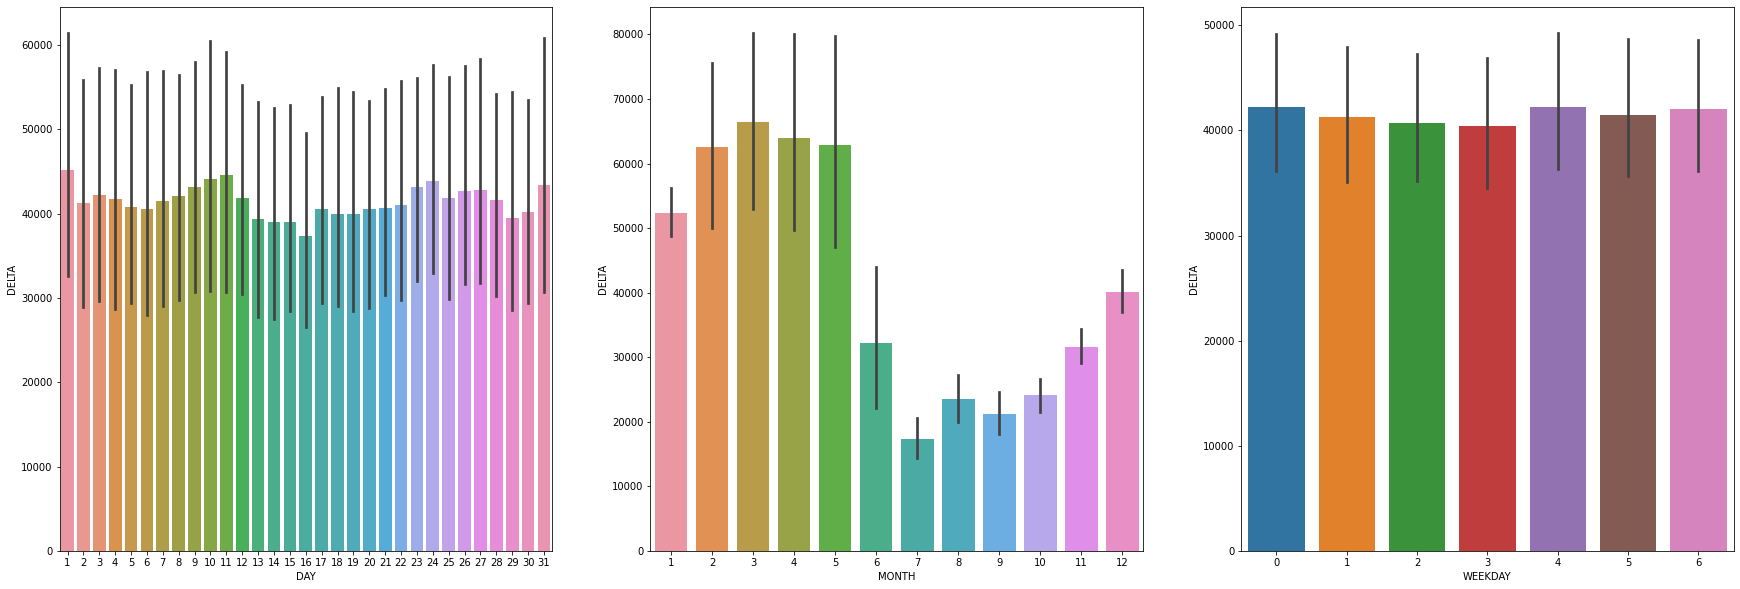

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

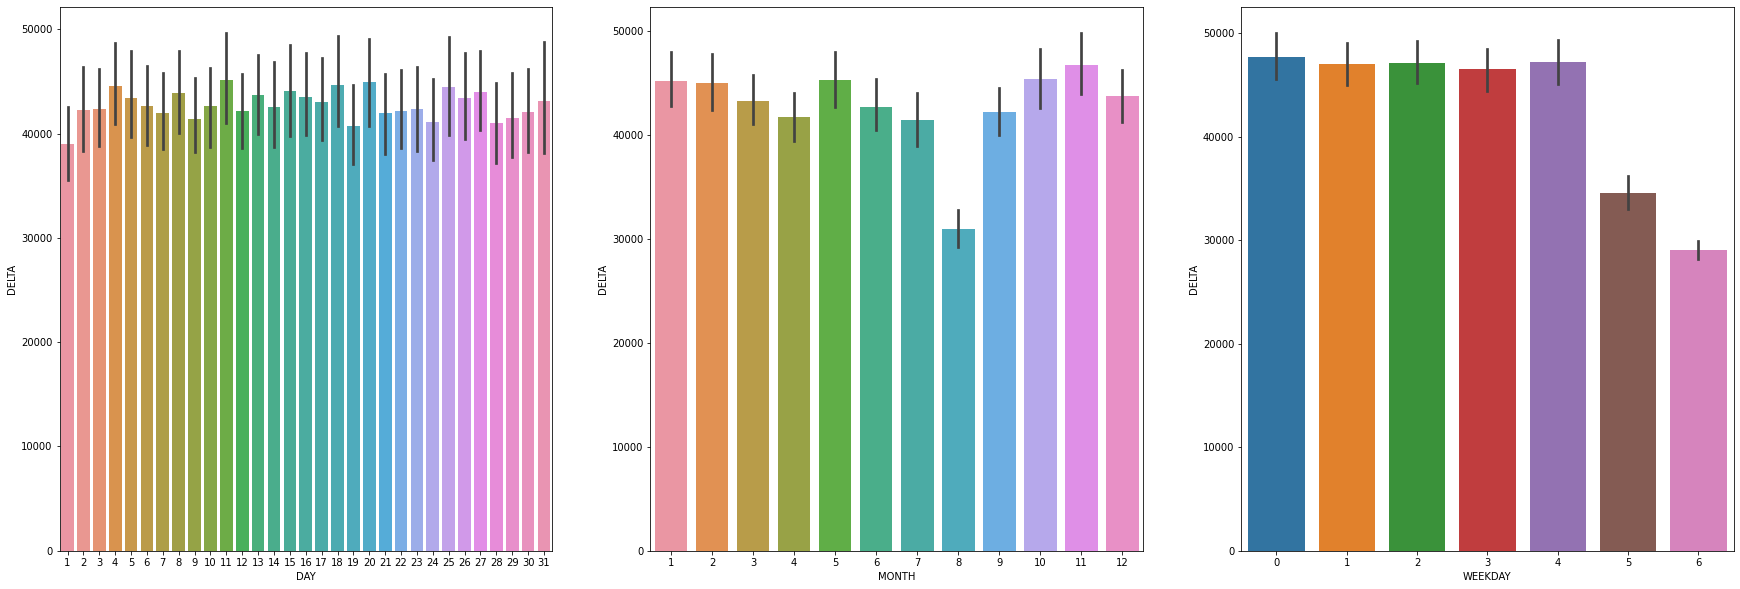

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

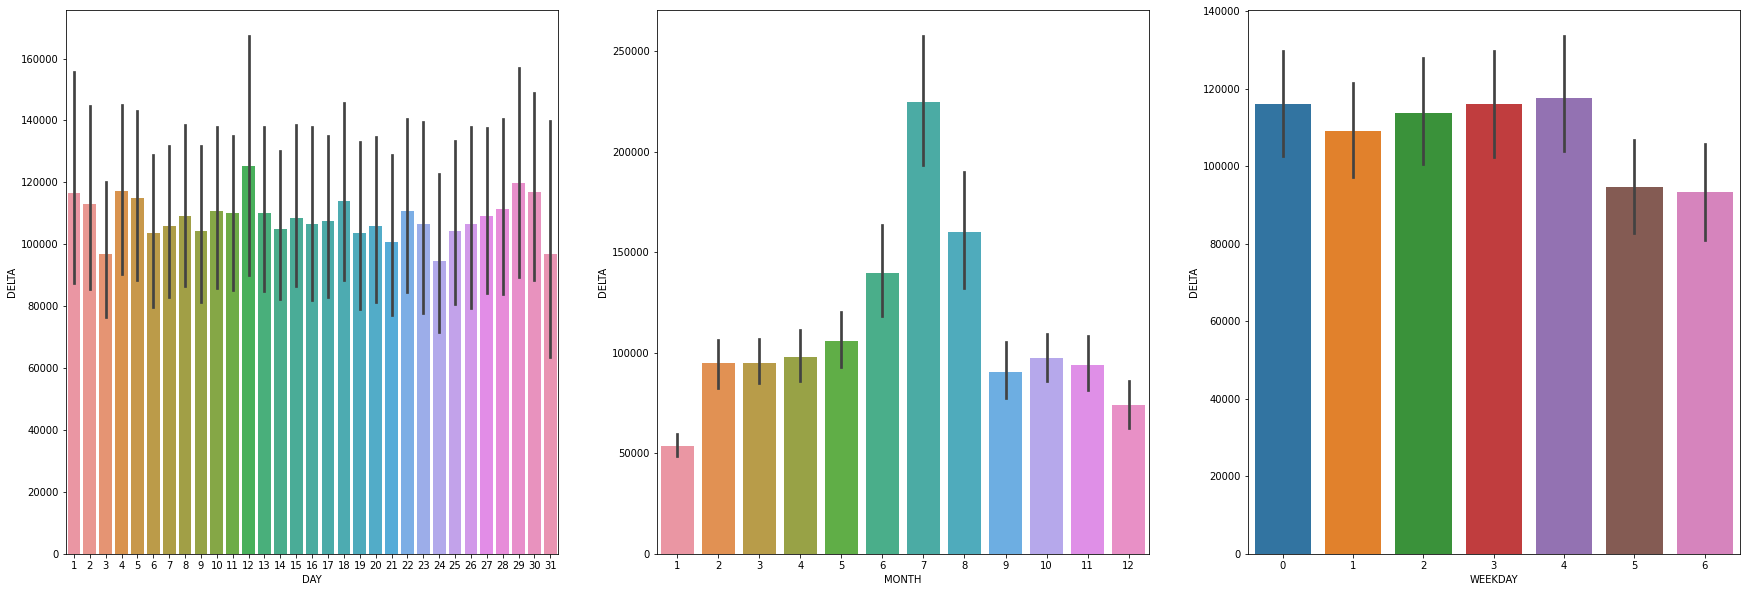

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

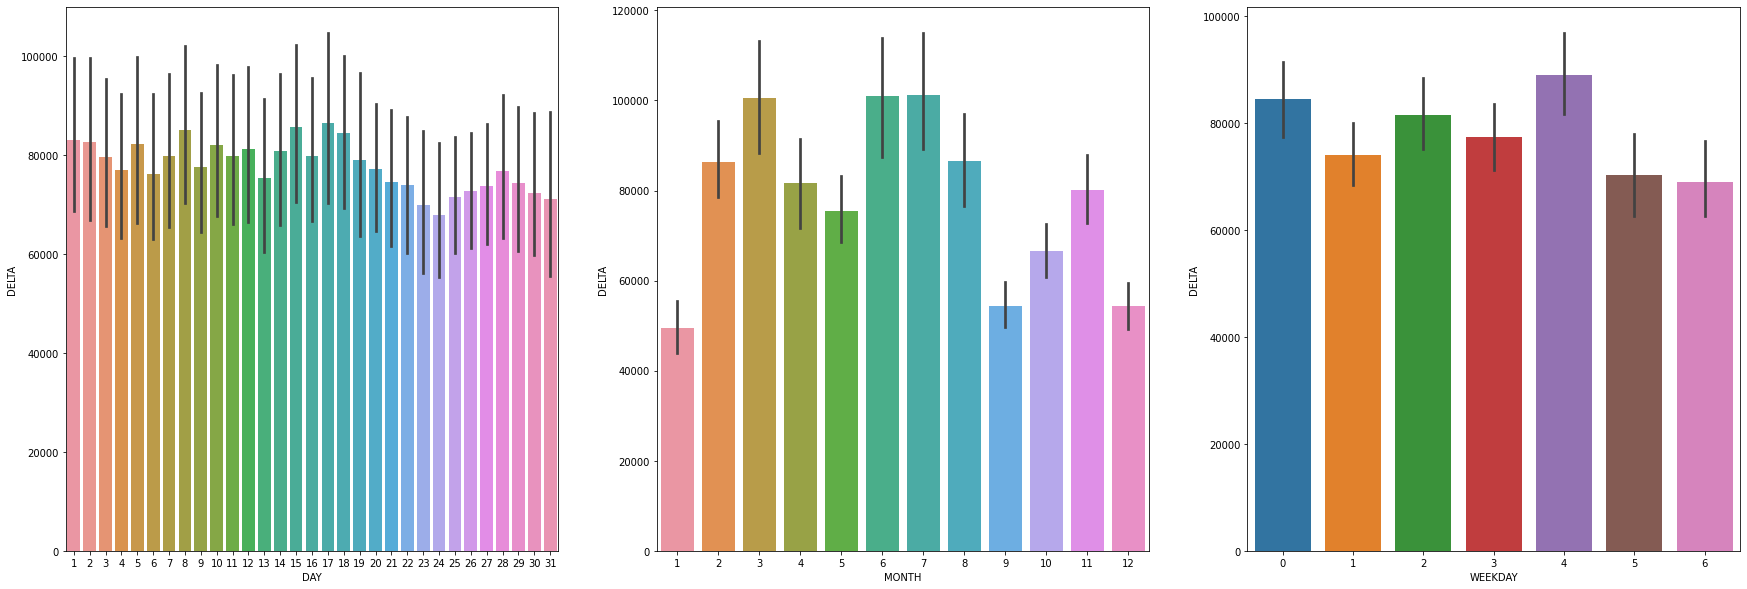

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

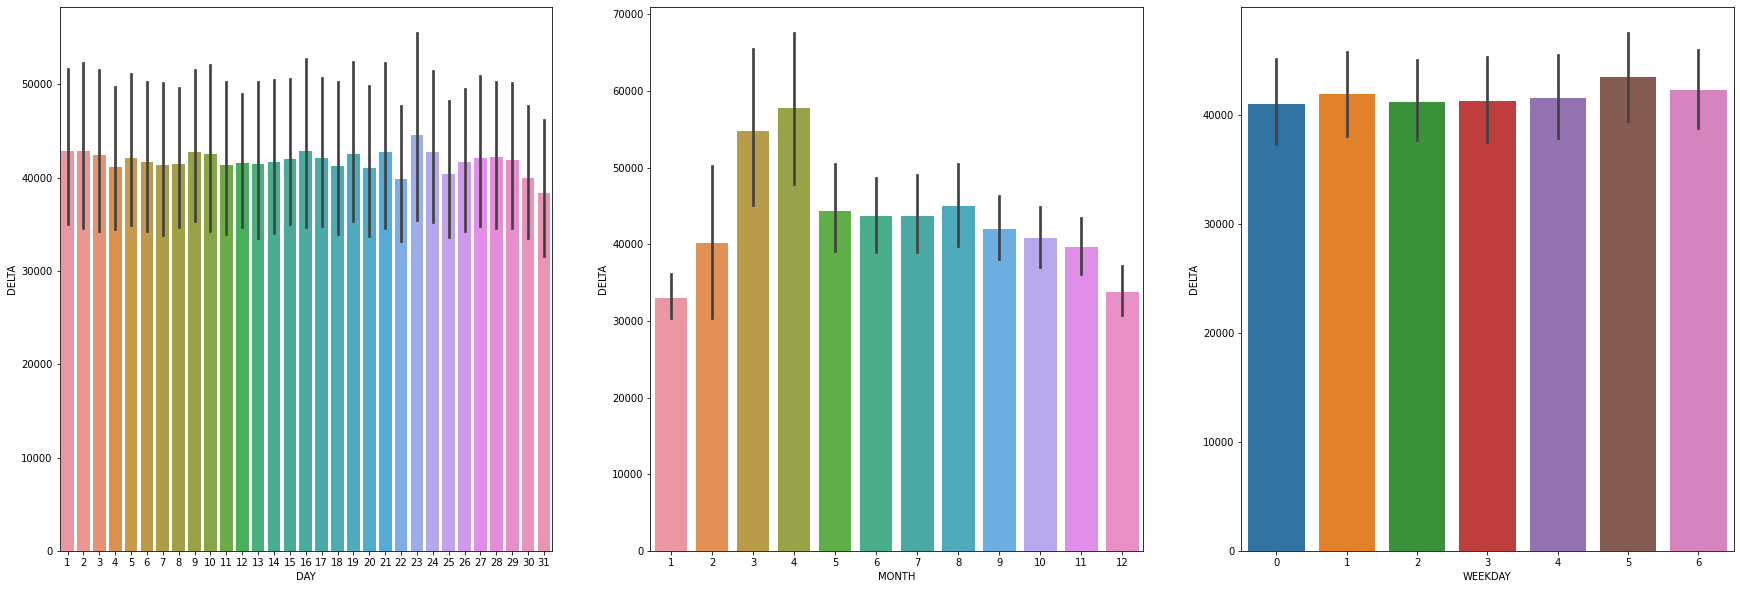

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

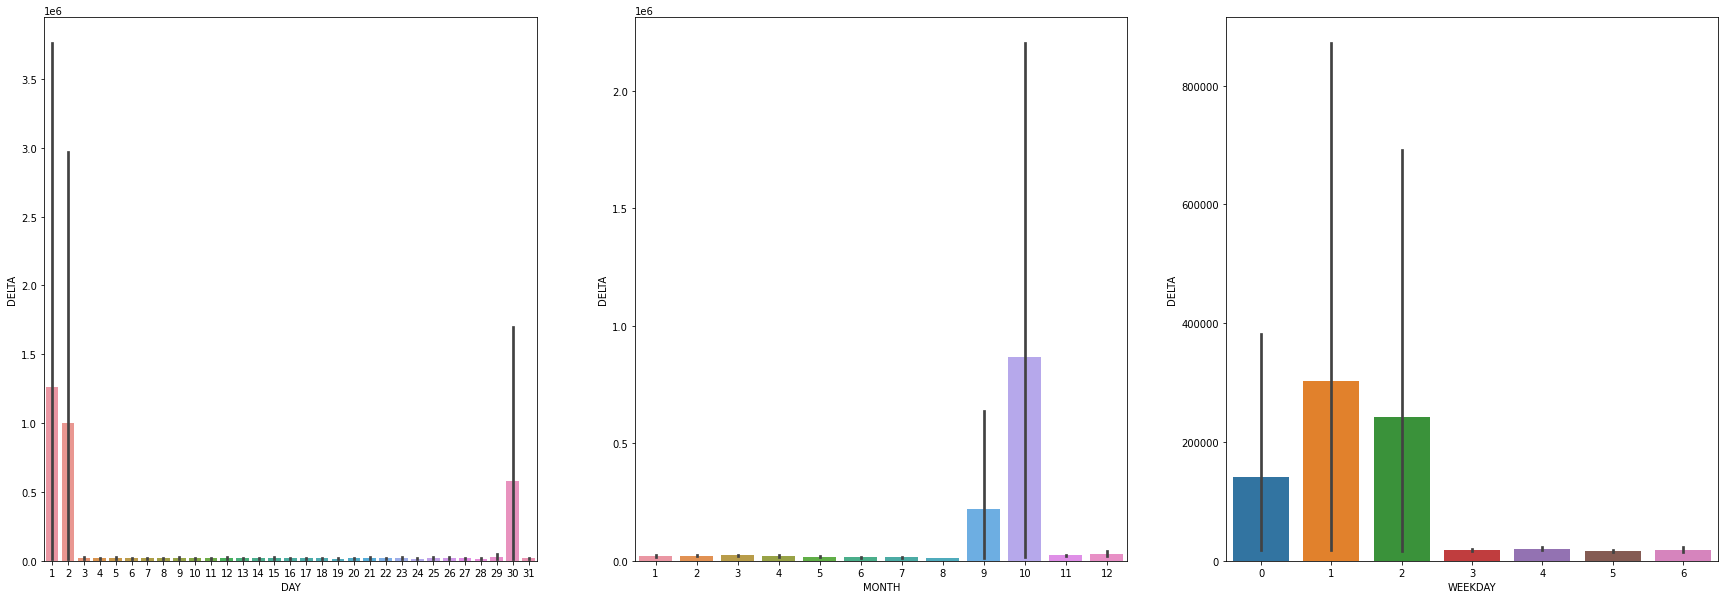

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

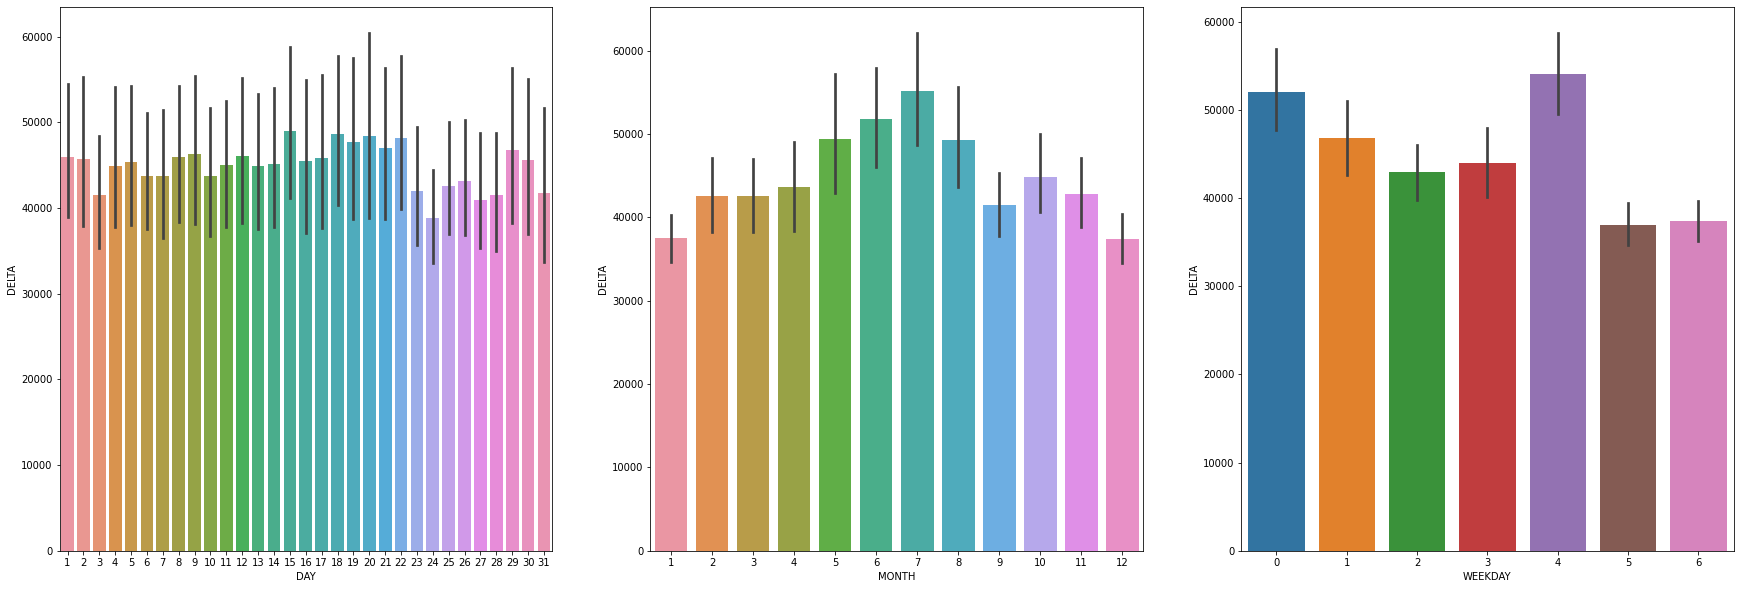

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

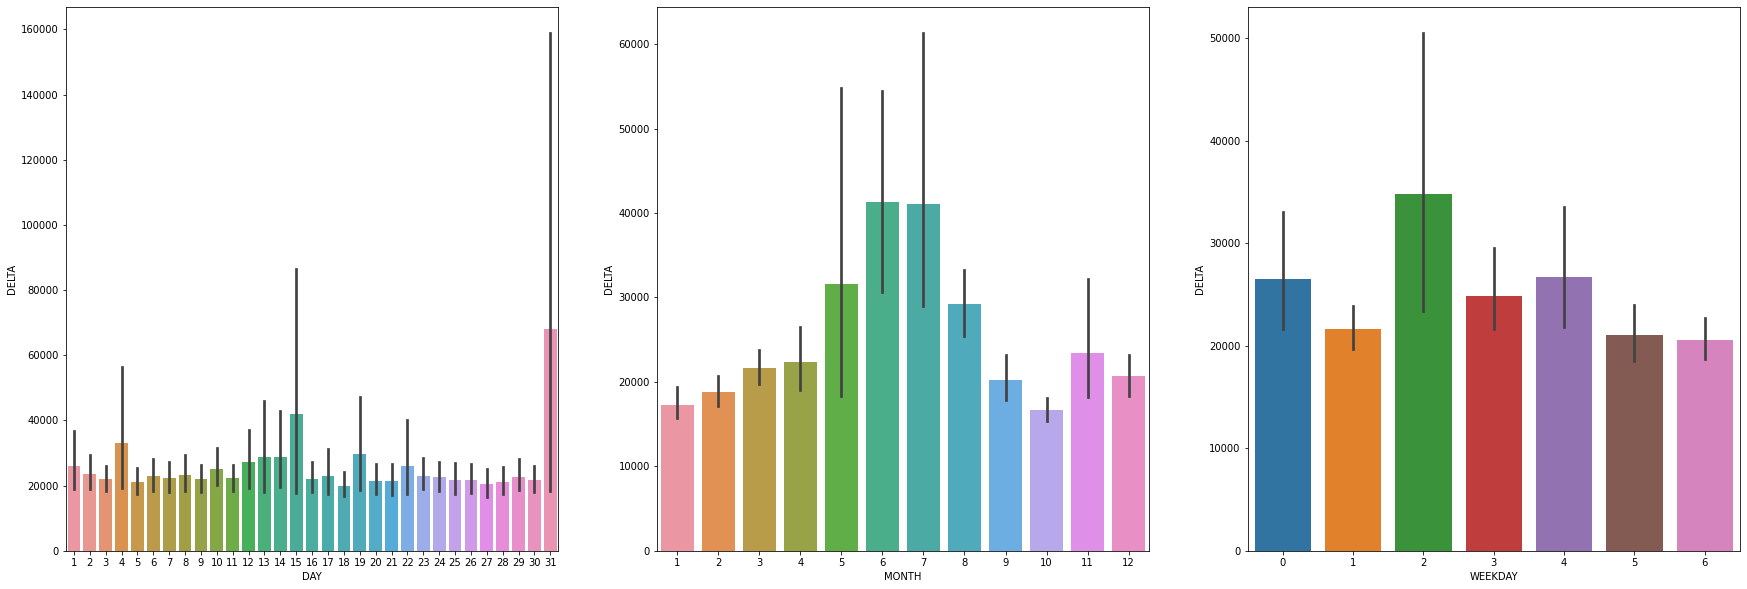

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

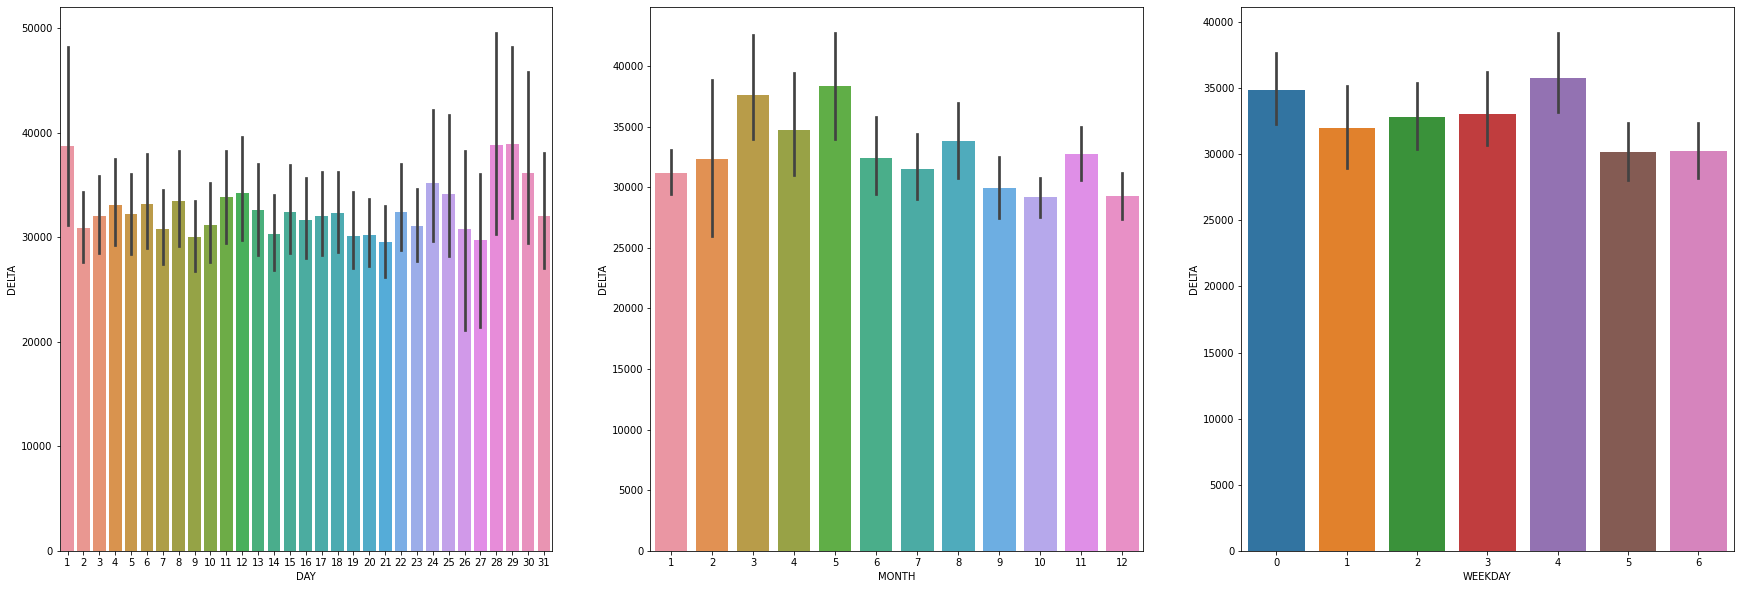

/tmp/ipykernel_40608/4272792384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['DAY'] = ds['SAMPLETIME'].dt.day
/tmp/ipykernel_40608/4272792384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['MONTH'] = ds['SAMPLETIME'].dt.month
/tmp/ipykernel_40608/4272792384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

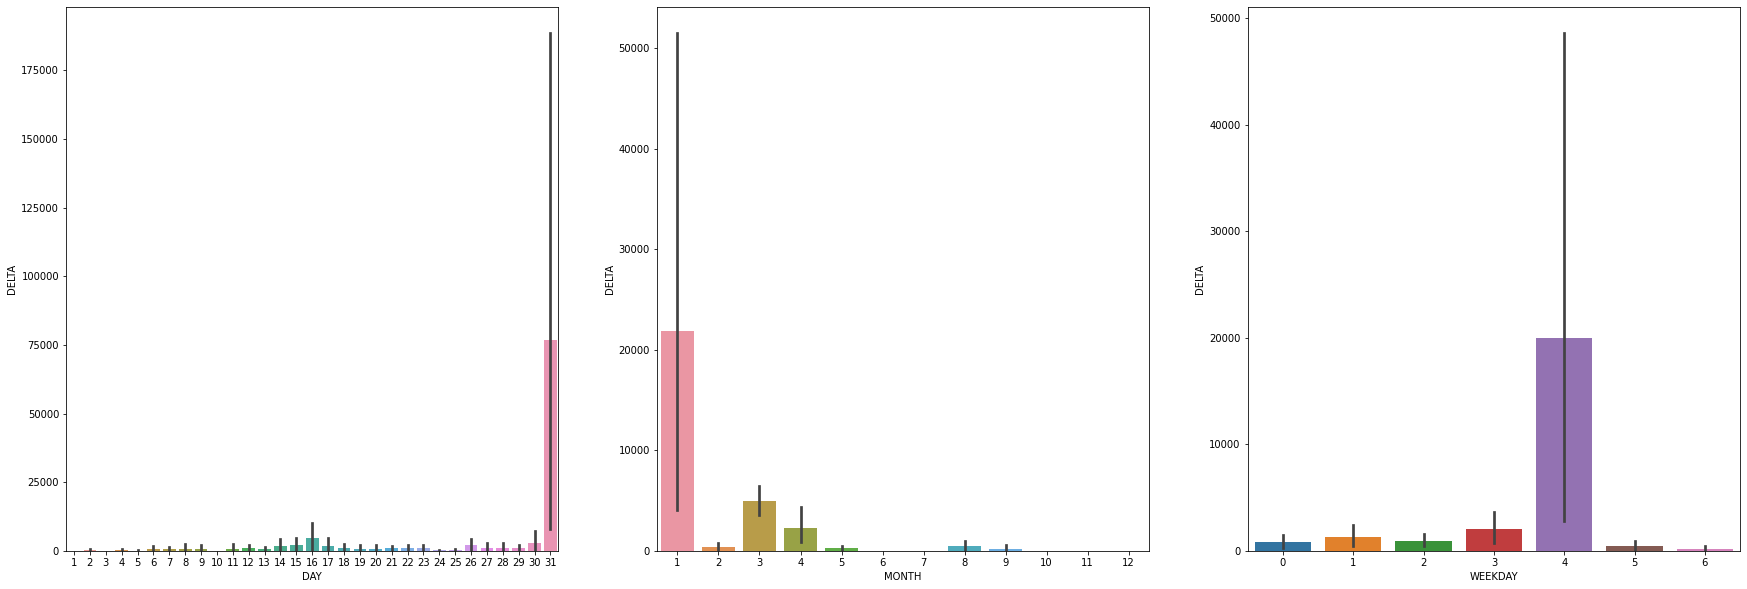

In [15]:
for yi in range(n):
    EDA(ds[ds['ID'].isin(ids2[y == yi])])

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  4 22:34:16 2022

@author: morte
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from pylab import *

def draw_silhouette(X_,cluster_labels):
    #Función que dibuja el silouette plot y devuelve los valores medios por cluster en orden.
    #Tambíen dibuja el valor medio con una línea discontínua.
    #
    #X_:- Matriz de datos que ha sido usada para clusterizar [muestras, características]
    #cluster_labels:-Etiquetas resultantes de la clusterización (vector)
    #
    #return, shiluete medio de cada cluster
    
    avg_sil_list = list()
    n_clusters = np.max(cluster_labels)
    X_ = X_.reshape([2747, 365])
    
    samples = silhouette_samples(X_,cluster_labels)
    y_lower = 10
    
    fig,ax=plt.subplots()
    silhouette_avg = silhouette_score(X_, cluster_labels)#silouette medio de todos los clústers
    
    #Dibujamos los diferenes clústers
    for i in range(n_clusters+1):
        it_sample = samples[cluster_labels == i]
        it_sample.sort()
        
        size_it_sample = it_sample.shape[0]
        y_upper = y_lower + size_it_sample
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            it_sample,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,)
    
        ax.text(-0.05, y_lower + 0.5 * size_it_sample, str(i))
        
        y_lower = y_upper+10
        print("cluster "+str(i)+" = "+str(np.mean(it_sample)))
        
        avg_sil_list.append(np.mean(it_sample))
    
    #Establecemos los retoques para que el gráfico sea legible
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")   
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])   
    
    return(avg_sil_list)

In [20]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
silhouette_score(X_train, y_train, metric="dtw")

0.061073816113412026

In [23]:
X.shape

(2747, 365, 1)

cluster 0 = 0.20613294002589405
cluster 1 = -0.09179210928272656
cluster 2 = -0.12032875238809715
cluster 3 = -0.09013136830978168
cluster 4 = 0.0827290871660836
cluster 5 = -0.1167071938004502
cluster 6 = -0.10495978259067446
cluster 7 = -0.1154807646861144
cluster 8 = -0.11220530288505767
cluster 9 = 0.7079281161626938


[0.20613294002589405,
 -0.09179210928272656,
 -0.12032875238809715,
 -0.09013136830978168,
 0.0827290871660836,
 -0.1167071938004502,
 -0.10495978259067446,
 -0.1154807646861144,
 -0.11220530288505767,
 0.7079281161626938]

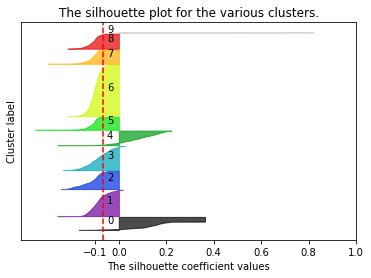

In [25]:
draw_silhouette(X, y)

# Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers import LSTM

2022-03-06 21:16:02.231236: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 21:16:02.231272: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [27]:
label = []
for yy in y:
    label.append(np.repeat(yy, 365))
    
label = np.array(label)

In [28]:
label = label.reshape((2747, 365, 1))

In [29]:
X = np.concatenate([X, label], axis=2)

In [30]:
X_red = X[:,:-1]
X_red =X_red.reshape((2747, 13, 28*2))

In [31]:
X_train = X_red[:,:-3]
y_train = X_red[:,1:-2, 0:28]

X_test = X_red[:,1:-2]
y_test = X_red[:,2:-1, 0:28]

In [32]:
model = Sequential([
                LSTM(128,input_shape=( X_train.shape[1], X_train.shape[2]), return_sequences=True, use_bias=True,
                                      dropout=0.2),
                # Lambda(lambda x: x[:, -366:, :]),
                Dense(units=28)
            ])

model.compile(loss='mean_squared_error', optimizer='adam')

2022-03-06 21:16:06.220158: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-06 21:16:06.220192: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (maquina-de-jose): /proc/driver/nvidia/version does not exist
2022-03-06 21:16:06.220783: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
86/86 [==============================] - 3s 12ms/step - loss: 2.5986
Epoch 2/20
86/86 [==============================] - 1s 15ms/step - loss: 0.5881
Epoch 3/20
86/86 [==============================] - 1s 13ms/step - loss: 0.5146
Epoch 4/20
86/86 [==============================] - 1s 12ms/step - loss: 0.4843
Epoch 5/20
86/86 [==============================] - 1s 11ms/step - loss: 0.4699
Epoch 6/20
86/86 [==============================] - 1s 11ms/step - loss: 0.4588
Epoch 7/20
86/86 [==============================] - 1s 15ms/step - loss: 0.4494
Epoch 8/20
86/86 [==============================] - 1s 16ms/step - loss: 0.4420
Epoch 9/20
86/86 [==============================] - 2s 17ms/step - loss: 0.4368
Epoch 10/20
86/86 [==============================] - 1s 14ms/step - loss: 0.4352
Epoch 11/20
86/86 [==============================] - 1s 13ms/step - loss: 0.4285
Epoch 12/20
86/86 [==============================] - 1s 11ms/step - loss: 0.4259
Epoch 13/20
86/86 [==================

In [34]:
preds = model.predict(X_test)

In [35]:
model.evaluate(X_test,y_test)

86/86 [==============================] - 1s 4ms/step - loss: 0.4498


0.4497879445552826

In [36]:
print(preds[0,:,-1])
print(y_test[0,:,-1])

[3.6151783 3.0897822 3.0503573 3.0290787 2.9820168 2.9207072 2.878494
 2.9050345 2.9198494 2.9196198]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


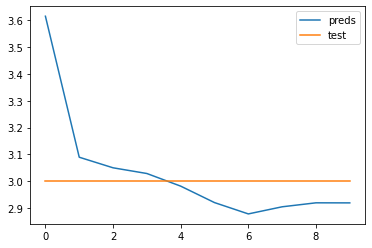

In [37]:
plt.plot(preds[0,:,-1], label='preds')
plt.plot(y_test[0,:,-1], label='test')
plt.legend()